## Face Embedding
### 나랑 닮은 연예인을 찾아보자
***
#### Step1. 사진 모으기

> **1. 내 사진 찍기**  
> ***1) 내 사진을 2장 이상 포함합시다.  
> 2) 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다.   
> 3) 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.  
> 4) 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.*** 
> 
> **2. 비교할 연예인 사진 모으기**

#### Step2. 얼굴 영역 자르기  

> **1) 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)을 통해서 잘라준다.**  
> **2) 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.**  
***
> **힌트
> from PIL import Image  
> face = get_gropped_face(image_path)  
> pillow_image = Image.fromarray(face)  
> pillow_image.save(path_to_save)**  
***

#### Step3. 얼굴 영역의 임베딩 추출하기
> **face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해보기. 
> 다른 사람의 임베딩은 구분할 수 있게 따로 저장하기.**
***
> **def get_face_embedding(face)  
> => 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수**  
>   
> **def get_face_embedding_dict(dir_path)  
> => 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수**  
***

#### Step4. 모은 연예인들과 비교하기
> **get_nearest_face(name, top=5) 함수들을 응용하여 가장 가까운 거리를 가진 연예인 찾기**

#### Step5. 다양한 재미있는 시각화 시도해 보기
***
#### 평가문항  
**1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.**  
**- 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.**
  
**2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.**  
**- 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.**
  
**3. 다양하고 재미있는 결과 시각화를 시도하였다.**  
**- matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.**  
***
**1) 라이브러리 불러오기**

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob

***
**2) 내사진으로 얼굴영역 잘라보기**

[(1094, 3164, 1760, 2499)]


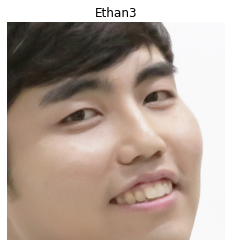

In [2]:
image_path = os.getenv('HOME')+'/aiffel/pic_sample/mypic/Ethan3.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.
# 해당 라인에서 결과물 출력
%matplotlib inline

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]
plt.title('Ethan3')
plt.axis("off")
plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

***
**3) 필요한 다양한 함수 선언**

In [3]:
# 얼굴 자르는 함수 선언
def get_gropped_face(image_file):
    # image변수에 'image_file'을 불러온 값을 저장
    image = face_recognition.load_image_file(image_file)
    # .face_loactaions()로 얼굴 영역 좌표 확인
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:
        cropped_face = []
    else: 
        a, b, c, d = face_locations[0]
        # 해당 얼굴영역으로 그림 자르기
        cropped_face = image[a:c,d:b,:]
    
    return cropped_face
            

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 이미지 폴더 주소를 넣으면 이미지를 플롯해주는 함수
def img_view(image_path):
    file_list = os.listdir(image_path)
    image_dict = {}
    cnt = 1
    if len(file_list) > 5:
        print("이미지의 갯수가 너무 많습니다.")
    else : 
        for file in file_list:
            file_name = file.split(".")[0]
            img_path = os.path.join(image_path, file)
            face = get_gropped_face(img_path)
            plt.figure(figsize=(len(file_list)*2,len(file_list)*2))
            plt.subplot(len(file_list),len(file_list),cnt)
            plt.imshow(face)
            plt.axis("off")
            plt.title(file_name)
            cnt += 1
      
        
# dir_path에 있는 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face) == 0: continue # 얼굴 인식 실패시 embedding_dict에 추가하지 않음
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict


# 임베딩 사전에서 name1과 name2의 거리를 구해주는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)


# 거리비교 key 함수
# name1과 name2의 거리를 비교하는 함수를 생성하되, 
# name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


# 임베딩벡터 거리가 가장 가까운 top5를 구하는 함수
def get_nearest_face(name, top=7):
    # [[YOUR CODE]]
    plt.figure(figsize=(top+top,top+top))
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    cnt = 1
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다.
            img_loc =  glob.glob(dir_path+"/"+sorted_faces[i][0]+".*")
            img_path = os.path.join(image_path, img_loc[0])
            face = get_gropped_face(img_path)
            plt.subplot(top+1,top+1,cnt)
            plt.imshow(face)
            plt.title("My picture")
            plt.axis('off')
            cnt+=1
            continue
        if i == 1 or i == 2 :   # 내사진 제외.
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            img_loc =  glob.glob(dir_path+"/"+sorted_faces[i][0]+".*")
            img_path = os.path.join(image_path, img_loc[0])
            face = get_gropped_face(img_path)
            plt.subplot(top+1,top+1,cnt)
            plt.imshow(face)
            plt.title("Similar Top "+str(i-2))
            plt.axis('off')
            cnt+=1

***
**4) 내사진들간의 임베딩 벡터거리 구해보기**

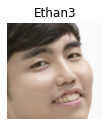

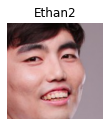

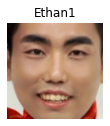

In [4]:
# 내사진 얼굴 자르기
mypic_path = os.getenv('HOME')+'/aiffel/pic_sample/mypic'
img_view(mypic_path)

In [5]:
# 내사진의 임베딩 벡터간 거리 구하기
# mypic에 있는 내 사진을 임베딩 벡터를 구해서 임베딩 사전에 넣어줌
embedding_dict = get_face_embedding_dict(mypic_path)
# 내사진의 임베딩 벡커 거리 구하기
print(get_distance('Ethan1', 'Ethan2')
      ,get_distance('Ethan2', 'Ethan3')
      ,get_distance('Ethan1', 'Ethan3'))

0.29524699836290885 0.2578591537393032 0.29184729419306527


**내 사진간의 거리가 0.3 이하로 매우 가까운 것을 알 수 있다.**  
**위의 사진모두를 가지고 닮은꼴 찾기를 진행해하기로 결정하였다.**
***
**5) 연예인들의 사진 모아 임베딩 벡터 사전 만들기**

In [6]:
dir_path = os.getenv('HOME')+'/aiffel/pic_sample/allpic'
file_list = os.listdir(dir_path)
print(file_list)

['이대형.jpg', '송일국.jpeg', '강석우.jpeg', '권율.jpeg', '채연.jpg', '송종호.jpeg', '윤문식.jpeg', '이승기.jpeg', 'clinton.jpeg', '심수창.jpeg', '이종현.jpeg', '안세하.jpeg', '박주형.jpeg', '이용진.jpg', '정해인.jpeg', '이용주.jpeg', '박재범.jpg', '이종원.jpeg', '황정민.jpg', '김영삼.jpeg', '이수혁.jpeg', '설경구.jpeg', '송강호.jpeg', '이재원.jpeg', '박철호.jpeg', '김강훈.jpeg', '이일재.jpeg', '이근대위.jpeg', '유순철.jpeg', '아이즈원민주.jpg', '신이안.jpeg', '류진.jpeg', '하정우.jpg', '강은탁.jpeg', '이상인.jpeg', '손호준.jpeg', '줄리엔강.png', '송중기.jpeg', '김우빈.jpeg', '이안 굿펠로우.jpg', '유노윤호.jpg', '장원준.jpeg', '엄기준.jpeg', 'biden.jpg', '연준석.jpeg', '송영창.jpeg', '이원종.jpeg', '박해준.jpeg', '찬열.jpeg', '박용택.jpg', '무라니시.png', '장혁.jpeg', '윤균상.jpg', '인교진.jpeg', '서현진.jpg', '이정섭.jpeg', '이선균.jpeg', '비니.jpg', '박은석.jpeg', '유아.jpg', '김응수.jpeg', '최민식.jpg', '김명준.jpeg', '김재영.jpeg', '김명민.jpeg', '성룡.jpg', '임시완.jpeg', '박정학.jpeg', '이성민.jpeg', '고경표.jpeg', '제이크 질렌할.jpeg', '우도환.jpeg', '기주봉.jpeg', '박나래.jpeg', '김갑수.jpeg', '고세원.jpeg', '기도훈.jpeg', '윤봉길.jpeg', '문별.jpg', '송창의.jpeg', '차두리.jpeg', '김윤석.jpeg', '박성웅.jpeg', '이연걸.jpeg',

In [7]:
print(len(file_list))

734


In [8]:
embedding_dict = get_face_embedding_dict(dir_path)

**총 734개(내사진 3개 포함)의 이미지를 가지고 임베딩 벡터 사전을 만들었다.**  
***
**6) 나랑 닮은꼴 연예인 찾기**  
**위에서 만들어 놓은 함수를 활용하여 내사진과 벡터거리가 가장 가까운 순서대로 출력하였다.**

순위 3 : 이름(옥냥이), 거리(0.38954393606059173)
순위 4 : 이름(이승철), 거리(0.42690326638848725)
순위 5 : 이름(권혁수), 거리(0.43444005456408485)
순위 6 : 이름(이승기), 거리(0.4350266360888969)
순위 7 : 이름(박상원), 거리(0.4367047719601846)


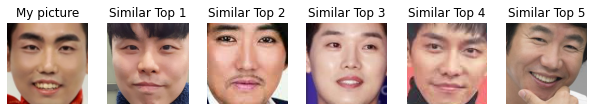

In [9]:
get_nearest_face('Ethan1')

순위 3 : 이름(성시경), 거리(0.43673423301455366)
순위 4 : 이름(이승철), 거리(0.4407791822521751)
순위 5 : 이름(박지빈), 거리(0.44450245976301367)
순위 6 : 이름(옥냥이), 거리(0.44590499272524875)
순위 7 : 이름(이승기), 거리(0.4603886016670355)


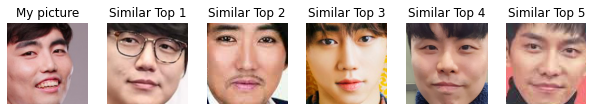

In [10]:
get_nearest_face('Ethan2')

순위 3 : 이름(박지빈), 거리(0.3979041777036962)
순위 4 : 이름(옥냥이), 거리(0.4352311776035256)
순위 5 : 이름(이용진), 거리(0.43716972484401523)
순위 6 : 이름(이승철), 거리(0.43890714462649266)
순위 7 : 이름(윤아), 거리(0.44531531443595423)


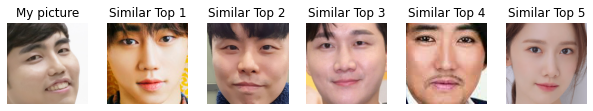

In [11]:
get_nearest_face('Ethan3')

***
**7) 결론**
> **내 각각의 사진의 임베딩 벡터거리와 가장 가까운 사진을 찾아 순서대로 출력해주는 함수를 확인해 본 결과,  
> 옥냥이님과의 벡터거리가 0.3895로 가장 가까웠고, 그다음으로 박지빈군이 0.3979, 그리고 마지막으로는 이승철님이 0.4269로 가까웠다.  
> 재밌는 점은 옥냥이님과 이승철님은 계속해서 닮은꼴로 나왔다는 점이다.  
> 이정도면 정말 비슷하지 않나 싶다.**  
***
**8) 회고록**
> **글자에서 말뭉치로 활용했던 임베딩을 사진으로 활용해서 닮은꼴을 찾는부분이 재밌었다.  
> 여러가지 사진으로 진행하면서 내가 이런것도 만들어보는구나 하는 느낌이었다.  
> 아직도 부족한 부분이 한참 많지만 계속해서 노력해야겠다.**  